# Segmented regressions with exponential sampling and heteroscedastic noise (real data)

In [1]:
%load_ext autoreload
%autoreload 2
from pytree import *
import random
import matplotlib.pyplot as plt
import numpy

print(__version__)
print(__git_version__)

0.0.6
6a7dd839335e0fdbfd073b0525a744e637c9a193


In [2]:
import pandas
df = pandas.read_csv('test_data/pingpong_loopback.csv')
df = df.groupby('size').mean().reset_index().sample(n=100, random_state=42)  # we take only 100 points to have a shorter duration
df

,size,duration
611,10557743,0.002983
822,834006358,0.321625
290,12592,0.000013
800,501695119,0.193278
168,1014,0.000004
...,...,...
811,631332737,0.242289
355,51608,0.000014
266,8100,0.000011
529,1964905,0.000281


## Top-down

Here, this is the usual stuff, we add breakpoints using a tree-like approach.

2
x ≤ 3.321e+06?
    └──x ≤ 1.580e+04?
    │    └──y ~ 8.866e-10x + 3.162e-06
    │    └──y ~ 1.564e-10x + 2.182e-06
    └──y ~ 3.468e-10x + -7.772e-17
CPU times: user 1min 54s, sys: 81.3 ms, total: 1min 54s
Wall time: 1min 54s


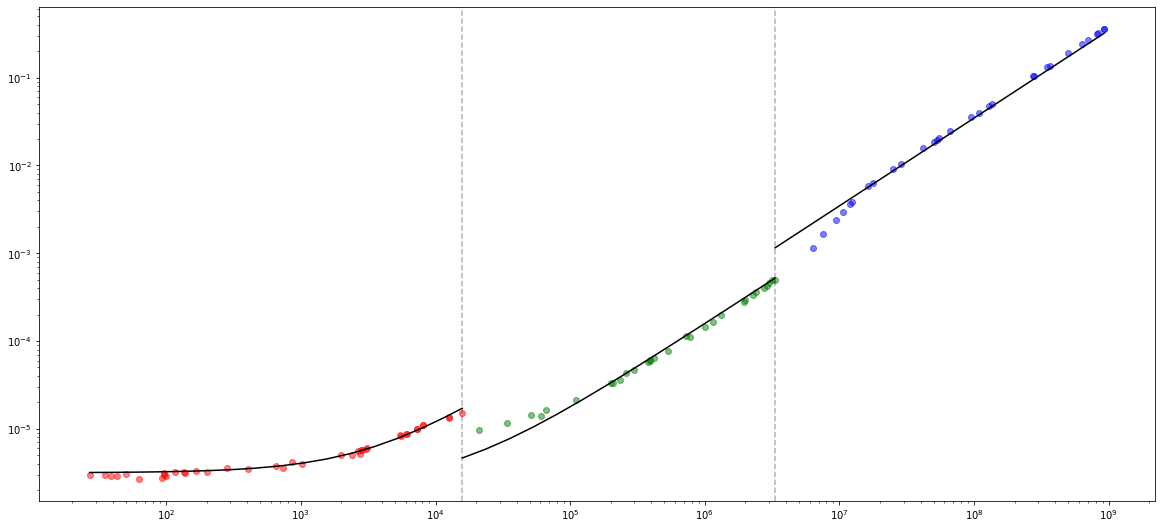

In [3]:
%%time
reg = compute_regression(df['size'], df['duration'], mode='log')
print(len(reg.breakpoints))
print(reg)
reg.plot_dataset(log=True)

## Bottom-up (classical)

Here we remove breakpoints greedily, using the BIC.

In [4]:
%%time
reg.simplify()

CPU times: user 4.86 s, sys: 0 ns, total: 4.86 s
Wall time: 4.93 s


,regression,RSS,BIC,AIC,BIClog,RSSlog,weighted_RSS,weighted_BIC,nb_breakpoints
0,"((27, 3.0053000000000015e-06), (35, 2.95732000...",0.000022,-1482.948171,-1511.605043,251.396182,2.007393,3.258064e-16,-3975.882992,2
1,"((27, 3.0053000000000015e-06), (35, 2.95732000...",0.000022,-1501.366900,-1519.603092,847.402452,8.151663,1.064421e-14,-3645.656846,1
2,"((27, 3.0053000000000015e-06), (35, 2.95732000...",0.000041,-1456.511239,-1464.326750,34175.102654,341.612871,4.040812e-14,-3530.676063,0


-inf < x ≤ 1.580e+04
	y ~ 8.866e-10x + 3.162e-06
1.580e+04 < x ≤ 3.321e+06
	y ~ 1.564e-10x + 2.182e-06
3.321e+06 < x ≤ inf
	y ~ 3.468e-10x + -4.754e-17
CPU times: user 5.01 s, sys: 11.9 ms, total: 5.02 s
Wall time: 5.02 s


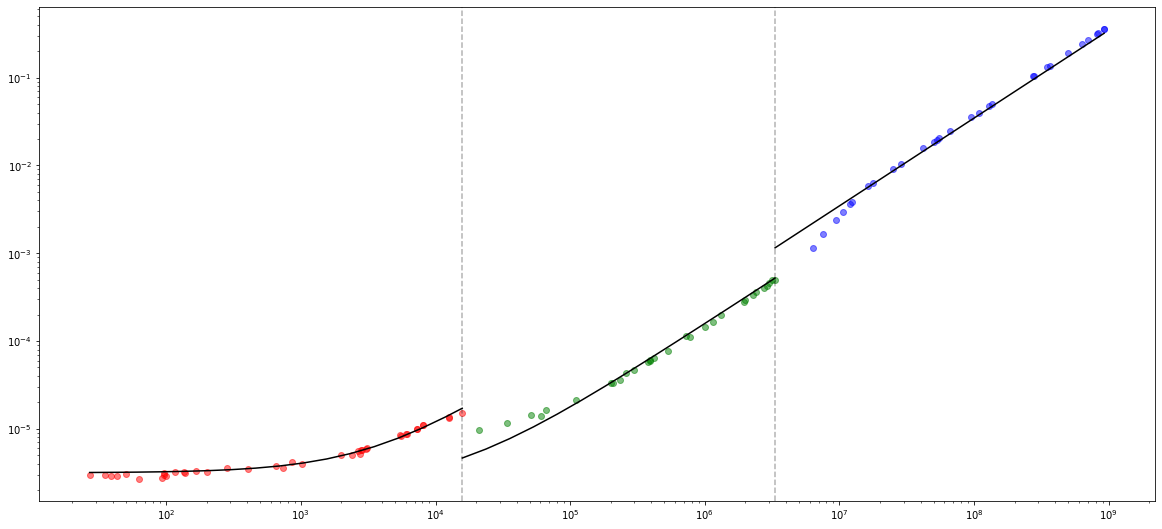

In [5]:
%%time
auto_simple = reg.auto_simplify()
print(auto_simple)
auto_simple.plot_dataset(log=True)

In [6]:
auto_simple.to_pandas()

,min_x,max_x,intercept,coefficient,RSS,MSE,RSSlog,weighted_RSS
0,-inf,15798.0,3.161530e-06,8.865756e-10,7.893095e-12,1.973274e-13,0.178061,3.256552e-16
1,15798.0,3321074.0,2.182371e-06,1.564206e-10,1.345379e-09,4.484597e-11,0.856053,6.979176e-20
2,3321074.0,inf,-4.753939e-17,3.467986e-10,2.185803e-05,7.286010e-07,0.973279,8.134423e-20
